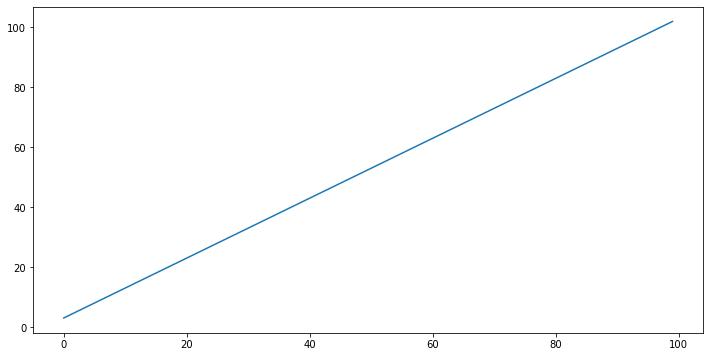

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102])

In [1]:
##lineAndRandomPoints
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.show()
line

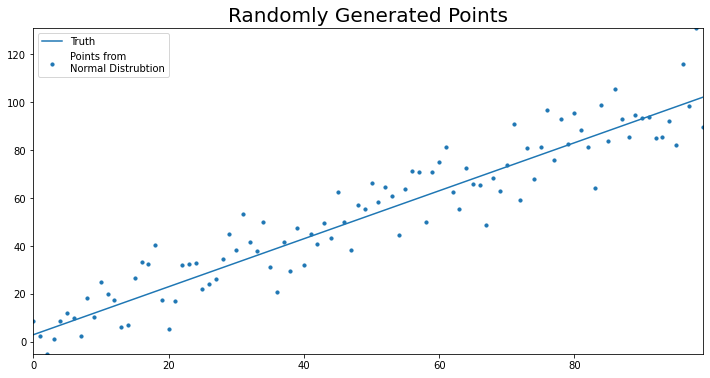

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, 10))

figure = plt.figure(figsize = (12, 6))
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.plot(line, label ="Truth")
plt.scatter(np.arange(len(points)), points, s = 10,
           label = "Points from\nNormal Distrubtion")
plt.title("Randomly Generated Points", fontsize = 20)
plt.legend(loc = "best")
plt.show()

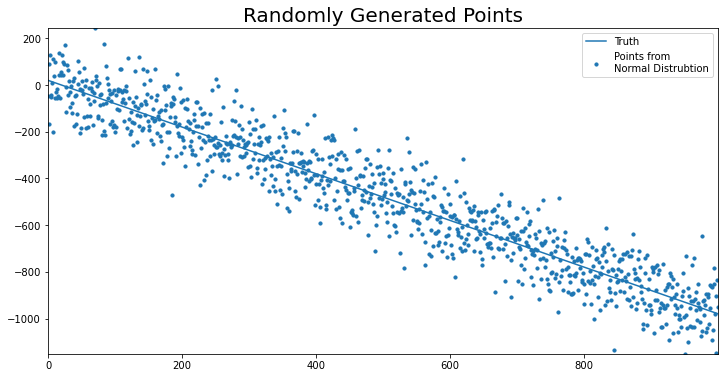

In [3]:
import random

def build_random_data_with_line(y_int, slope, SD = 1, line_length = 100):
    line = np.array([slope * i + y_int for i in range(line_length)])    
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        
    return line, points

def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):

    figure = plt.figure(figsize = (12, 6))
    plt.rcParams["axes.xmargin"] = 0
    plt.rcParams["axes.ymargin"] = 0
    plt.plot(line, label =line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = "Points from\nNormal Distrubtion")
    plt.title("Randomly Generated Points", fontsize = 20)
    plt.legend(loc = "best")
    plt.show()
    
line, points = build_random_data_with_line(y_int = 20, slope = -1, SD = 100, line_length = 1000)
plot_line(line, points)

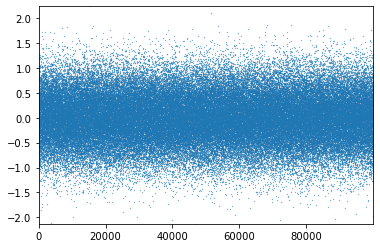

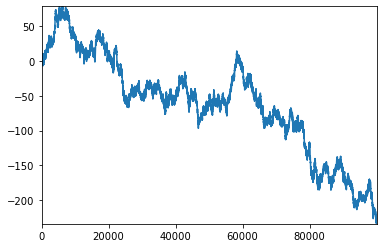

In [4]:
#montecarloSimulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


mu = 0
#SD is sigma, variance is sigma**2
sigma = .5
random_list = []
observations = 100000
for i in range(100000):
    random_list.append(random.normalvariate(mu, sigma))

plt.plot(random_list, ls = "",linewidth = 1, marker =".", markersize = .5)
plt.show()
plt.close()

simulation = [] 

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i-1] + val)
        
plt.plot(simulation)
plt.show()
plt.close()



In [5]:
def run_monte_carlo(mean, sigma, num_sims, sim_dict, index):
    
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)


In [6]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
index = np.arange(2000)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0         1         2         3         4         5         6     \
0    -0.078840 -0.229828  0.359568  0.034453 -2.345253  0.589466  0.875992   
1    -1.013815  0.228455  0.437613 -1.424682 -0.088612  0.167577  0.902120   
2     0.932844  0.254329  0.359270 -0.855647 -1.528581  0.823380  1.212498   
3    -1.161553  1.913125 -0.438943 -1.087199  0.510915  0.056950 -0.326134   
4     0.033539  1.154423 -0.803197  1.650881  1.236659  0.920056 -2.032000   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.220552 -0.470017 -0.710948  1.273180 -0.562852 -0.369805 -1.900795   
1996  0.012515 -0.575150  0.364529 -0.468775  0.679361  0.077394  1.895111   
1997  0.619667  0.574823  1.107454 -0.581710 -0.572924 -2.311906 -1.279928   
1998  0.372531 -0.342608  1.698235  1.899937  0.327307 -0.621073 -0.995730   
1999 -0.330993 -1.041889  0.029488 -1.802108 -1.450765  1.228852  1.374093   

          7         8         9     ...      1990      1991      1992  \
0    -0.659931  0.695643 -1.293176  ...  1.309393 -1.313833 -0.380208   
1     2.818834 -0.177392 -0.487014  ... -1.888267  1.729836 -0.371234   
2    -0.450839 -0.921577  0.839746  ... -0.190864 -1.550658  0.316699   
3     0.881200 -1.459678  0.331112  ... -0.496594 -1.039421 -0.784941   
4     1.167223  0.922585 -0.626110  ... -1.997839  2.133002 -0.505596   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.224709  0.452709  0.354520  ... -1.514842  1.408960  0.184055   
1996  0.282424  0.815675 -2.651896  ... -0.243476  0.385621  0.297097   
1997  1.367806 -2.618709 -0.574097  ...  0.905791  0.463089 -0.405532   
1998 -0.423891 -0.957613  0.304521  ...  0.875977 -1.322054 -0.822942   
1999 -0.901787 -0.376284 -0.560984  ...  1.905539 -0.192164 -0.528558   

          1993      1994      1995      1996      1997      1998      1999  
0     0.675917  0.278986 -0.124708  0.470571  1.090346  0.152880 -1.055754  
1    -0.939969  2.398089  0.748232 -0.312949  0.807082  0.332752 -0.270833  
2     0.588047  0.778533 -0.386168 -1.637840 -0.076247  0.249872 -0.614847  
3     0.270572 -0.593403  2.001708 -0.647668  1.073588  1.422510  1.007351  
4     0.648421 -0.324451 -0.746414  0.382034 -1.018568  3.545647  0.852099  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -1.796253  0.641257 -0.655214 -0.161721 -0.139667  0.215601  0.012533  
1996  0.590317 -0.301327 -0.951685 -0.899955 -0.554069  1.433021  0.207749  
1997  0.289875  0.357651 -0.497831 -0.006251 -0.137710 -0.827593 -0.915790  
1998  1.509271 -0.400610 -0.293278  0.880795  0.918878  0.988939 -2.958228  
1999  1.025509 -0.397287 -0.138520  0.097355  0.110896 -0.004254  0.683256  

[2000 rows x 2000 columns]

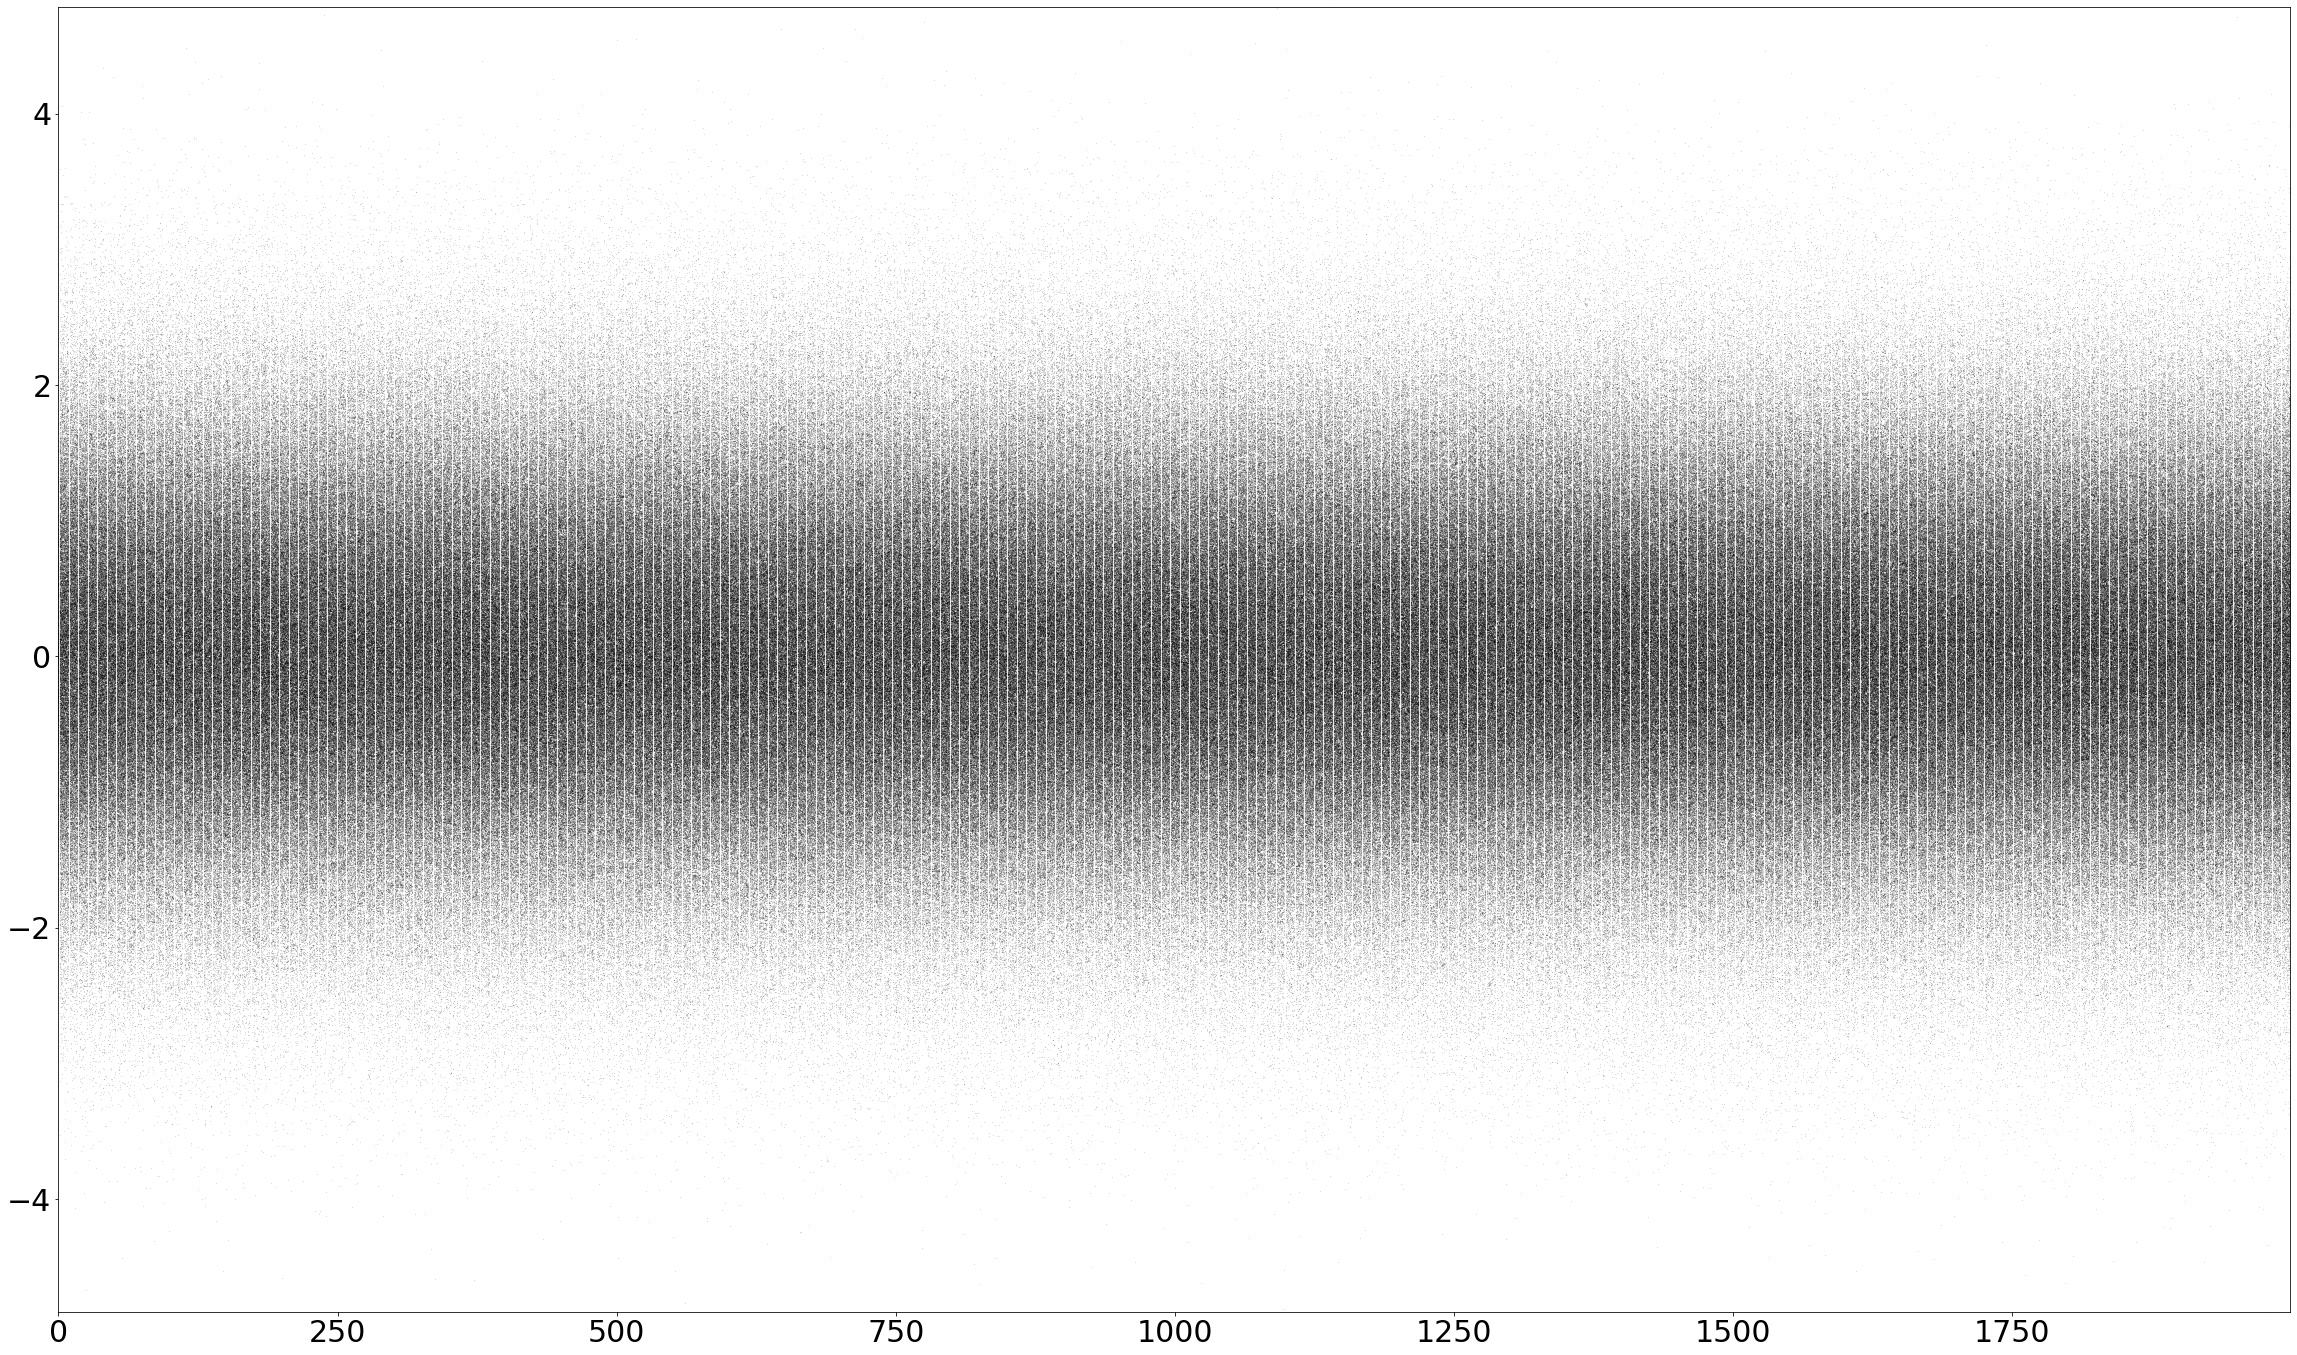

In [7]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, ls = " ", marker=".", markersize = .2, 
                            color ="k", alpha = .5, ax = ax)

plt.show()

<ipython-input-8-d93dfd6ebd52>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


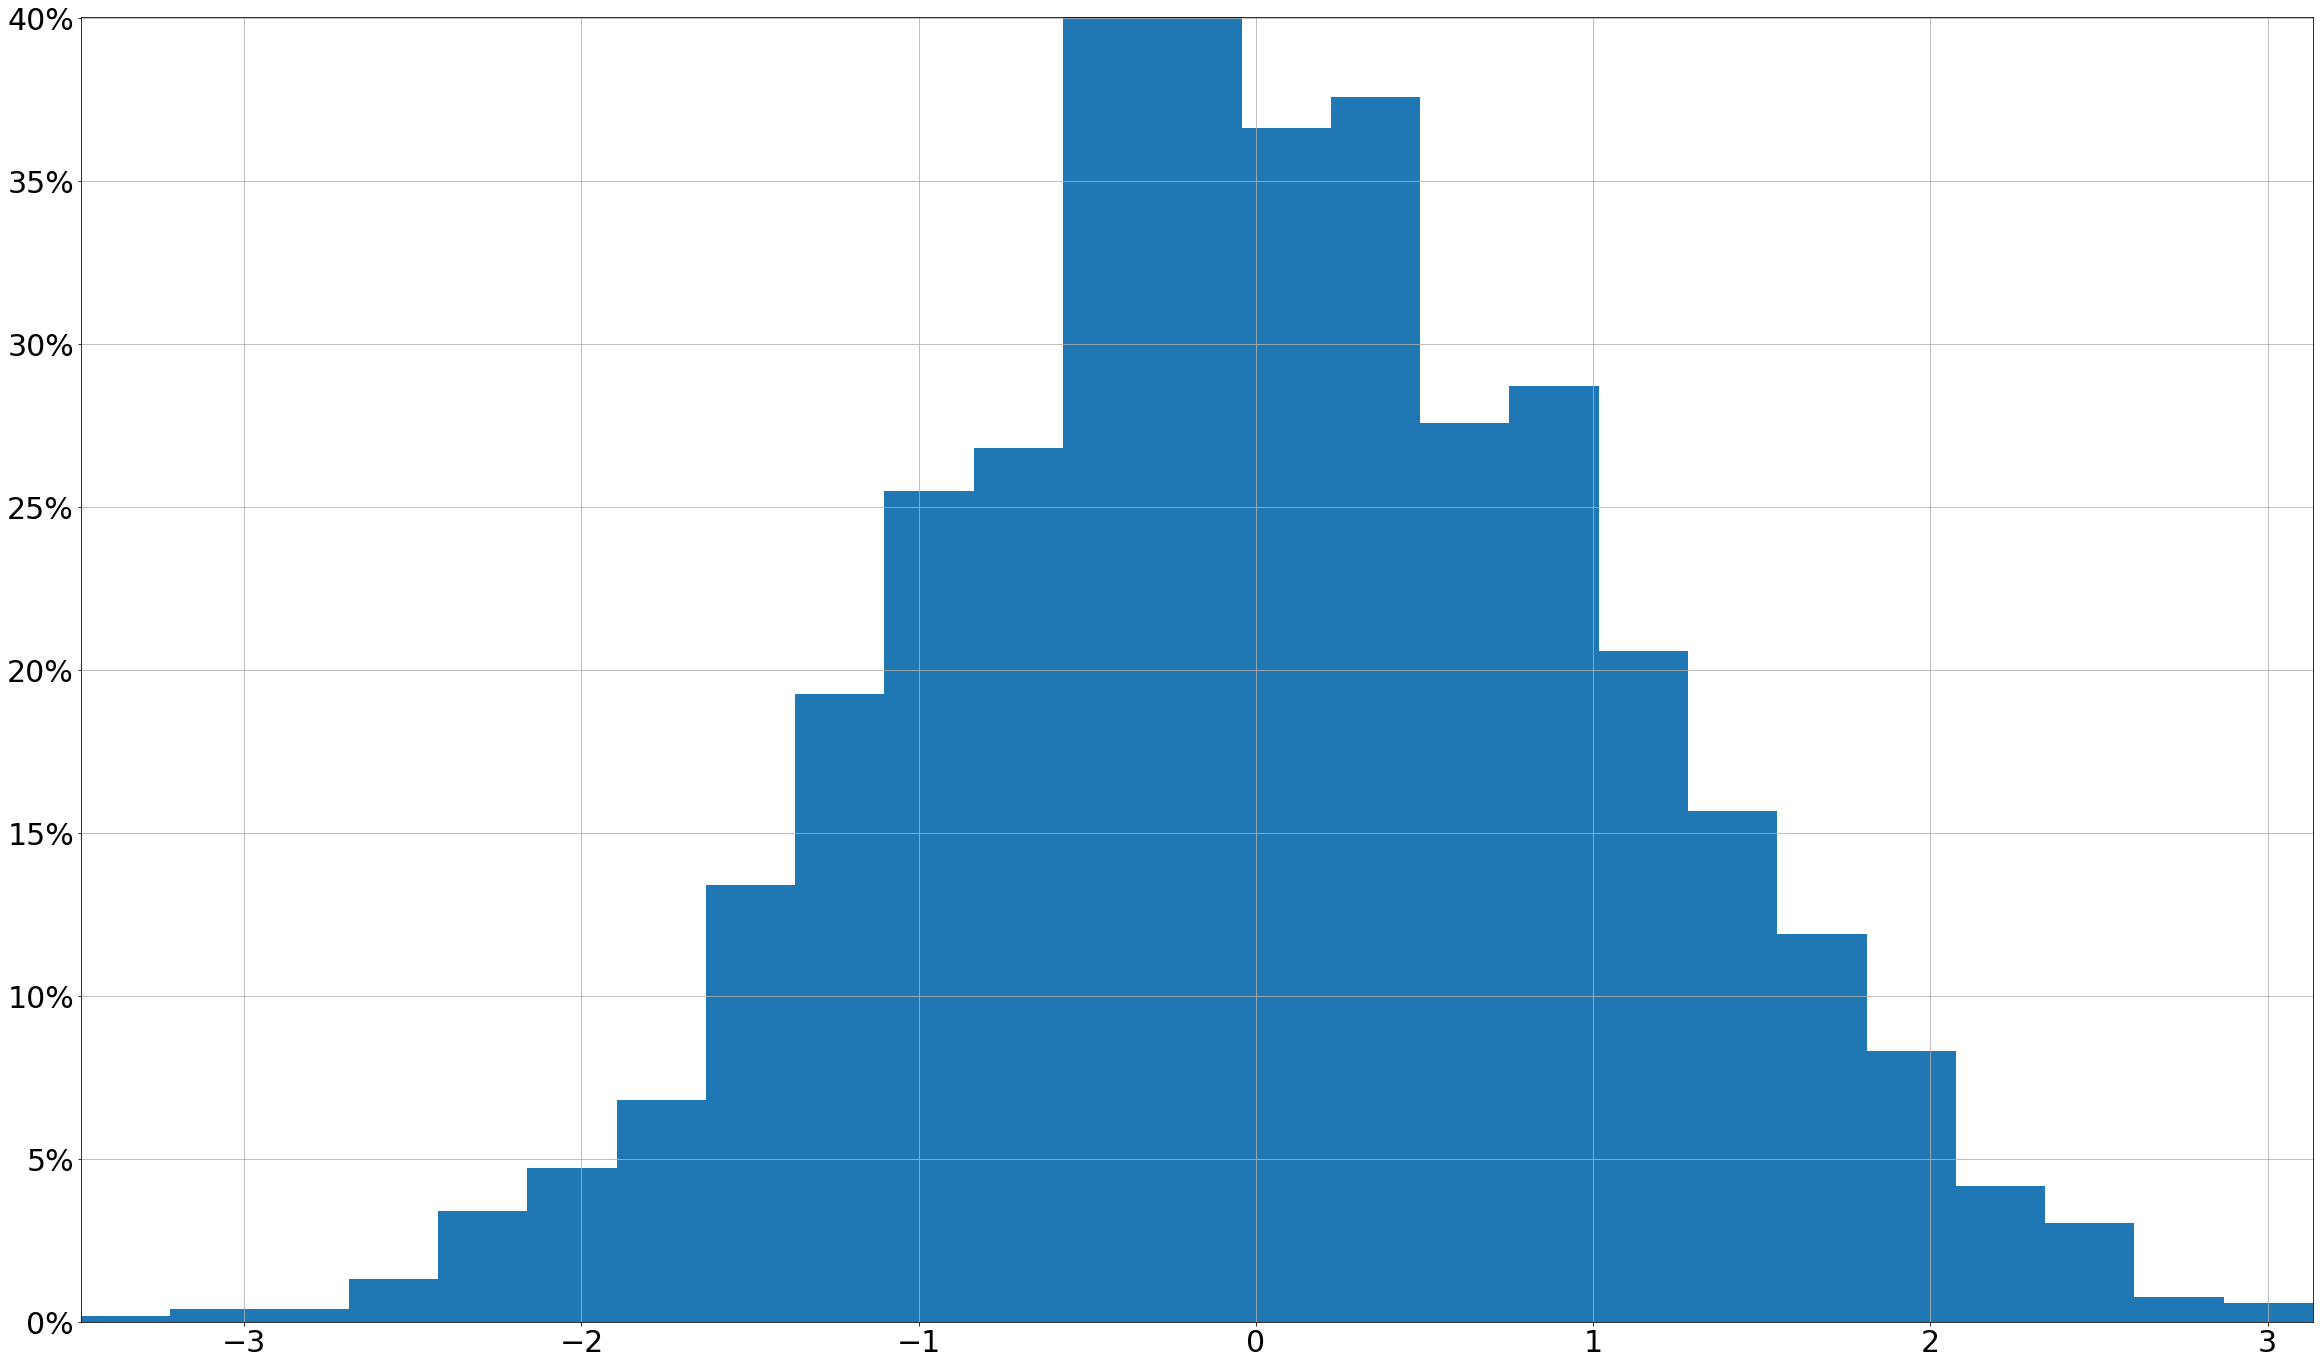

In [8]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                                ax = ax)

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
plt.show()
plt.close()

## Monte Carlo with a Positive Trend

In [9]:
mean = .05
sigma = .5
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 2000
index = np.arange(periods)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df

0          1           2           3          4           5     \
0     -0.258377  -0.122588    0.034389    0.027913  -0.222646   -0.590574   
1     -0.679679  -0.000076    0.051337   -0.965483   0.503219   -0.946173   
2     -0.803602  -0.211788    0.160779   -0.560174  -0.204085   -1.409214   
3     -0.798505  -0.284528   -0.241444   -0.026507  -0.583914   -1.051877   
4     -0.468759   0.014855    0.176197    0.981309  -0.512766   -0.921504   
...         ...        ...         ...         ...        ...         ...   
1995  86.104966  95.030726  163.396550   98.393209  87.514745  113.884599   
1996  87.084608  95.916653  163.357941   98.829512  88.303093  113.606924   
1997  87.144559  96.346285  163.414006   99.284866  87.846477  114.038142   
1998  87.427035  95.855398  162.738978  100.032998  87.348089  114.038952   
1999  88.213214  95.444881  162.868447   99.887483  88.559751  113.828292   

            6          7           8          9     ...        1990  \
0      -0.082220  -0.256032    0.536760   0.263144  ...   -0.734689   
1       0.470677   0.530174    0.479989  -0.925811  ...   -1.732344   
2      -0.435002   0.250939   -0.122649  -0.443995  ...   -2.409745   
3      -0.277397   0.308877   -0.469056  -0.261524  ...   -2.558312   
4      -0.742159   0.266816   -1.218352   0.043164  ...   -2.465802   
...          ...        ...         ...        ...  ...         ...   
1995  106.274367  87.926612  110.966447  68.380189  ...  113.483143   
1996  106.163995  88.347099  111.352767  68.446835  ...  112.813231   
1997  105.919721  88.778202  110.711451  68.454889  ...  113.012994   
1998  106.140524  89.104526  109.904199  69.147386  ...  113.563278   
1999  107.053443  88.907328  109.633794  69.892500  ...  113.900343   

           1991       1992       1993       1994        1995        1996  \
0     -0.293995  -0.589435   0.213777   0.522089    0.358486    0.399268   
1     -0.962970  -0.834186   0.248328   0.744213    0.760923    1.252302   
2     -1.794194  -0.772523   1.556507   0.068811    0.032605    1.463026   
3     -1.471748   0.177902   1.171373  -0.549584   -1.233877    1.368588   
4     -1.127927   0.243520   0.025044  -0.383646   -1.419957    1.588204   
...         ...        ...        ...        ...         ...         ...   
1995  92.208705  99.280198  66.324857  92.492764  145.502065  151.833472   
1996  92.448049  98.971876  66.371953  92.907765  146.141693  152.767281   
1997  93.202134  99.404011  66.242092  93.541895  146.094841  152.416163   
1998  93.460481  99.388228  66.272588  93.933250  146.243189  152.781279   
1999  93.094056  99.810797  66.850411  94.118985  146.713159  153.073045   

            1997       1998        1999  
0       0.123407  -0.207319    0.073434  
1       0.019071   1.138681    0.715634  
2       0.326892   1.198759    1.828100  
3       0.773667   1.144472    1.872729  
4       1.320699   1.459813    1.264310  
...          ...        ...         ...  
1995  100.340992  91.677964  101.210646  
1996  100.280254  92.149871  101.448930  
1997   99.700668  92.640750  101.785044  
1998  100.656659  91.964341  102.245150  
1999  101.040852  91.846278  101.831819  

[2000 rows x 2000 columns]

In [10]:
def plot_monte_carlo_sim(sim_data,  title = None, logy = True):
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
            legend=False, marker =".", markersize = .1, color = "k", alpha = .05, logy = logy, ax = ax)
    sim_data["mean"].plot.line(legend = False, color = "C3", linewidth = 5, logy = logy, ax = ax)
    index = list(sim_data.index) 
    
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

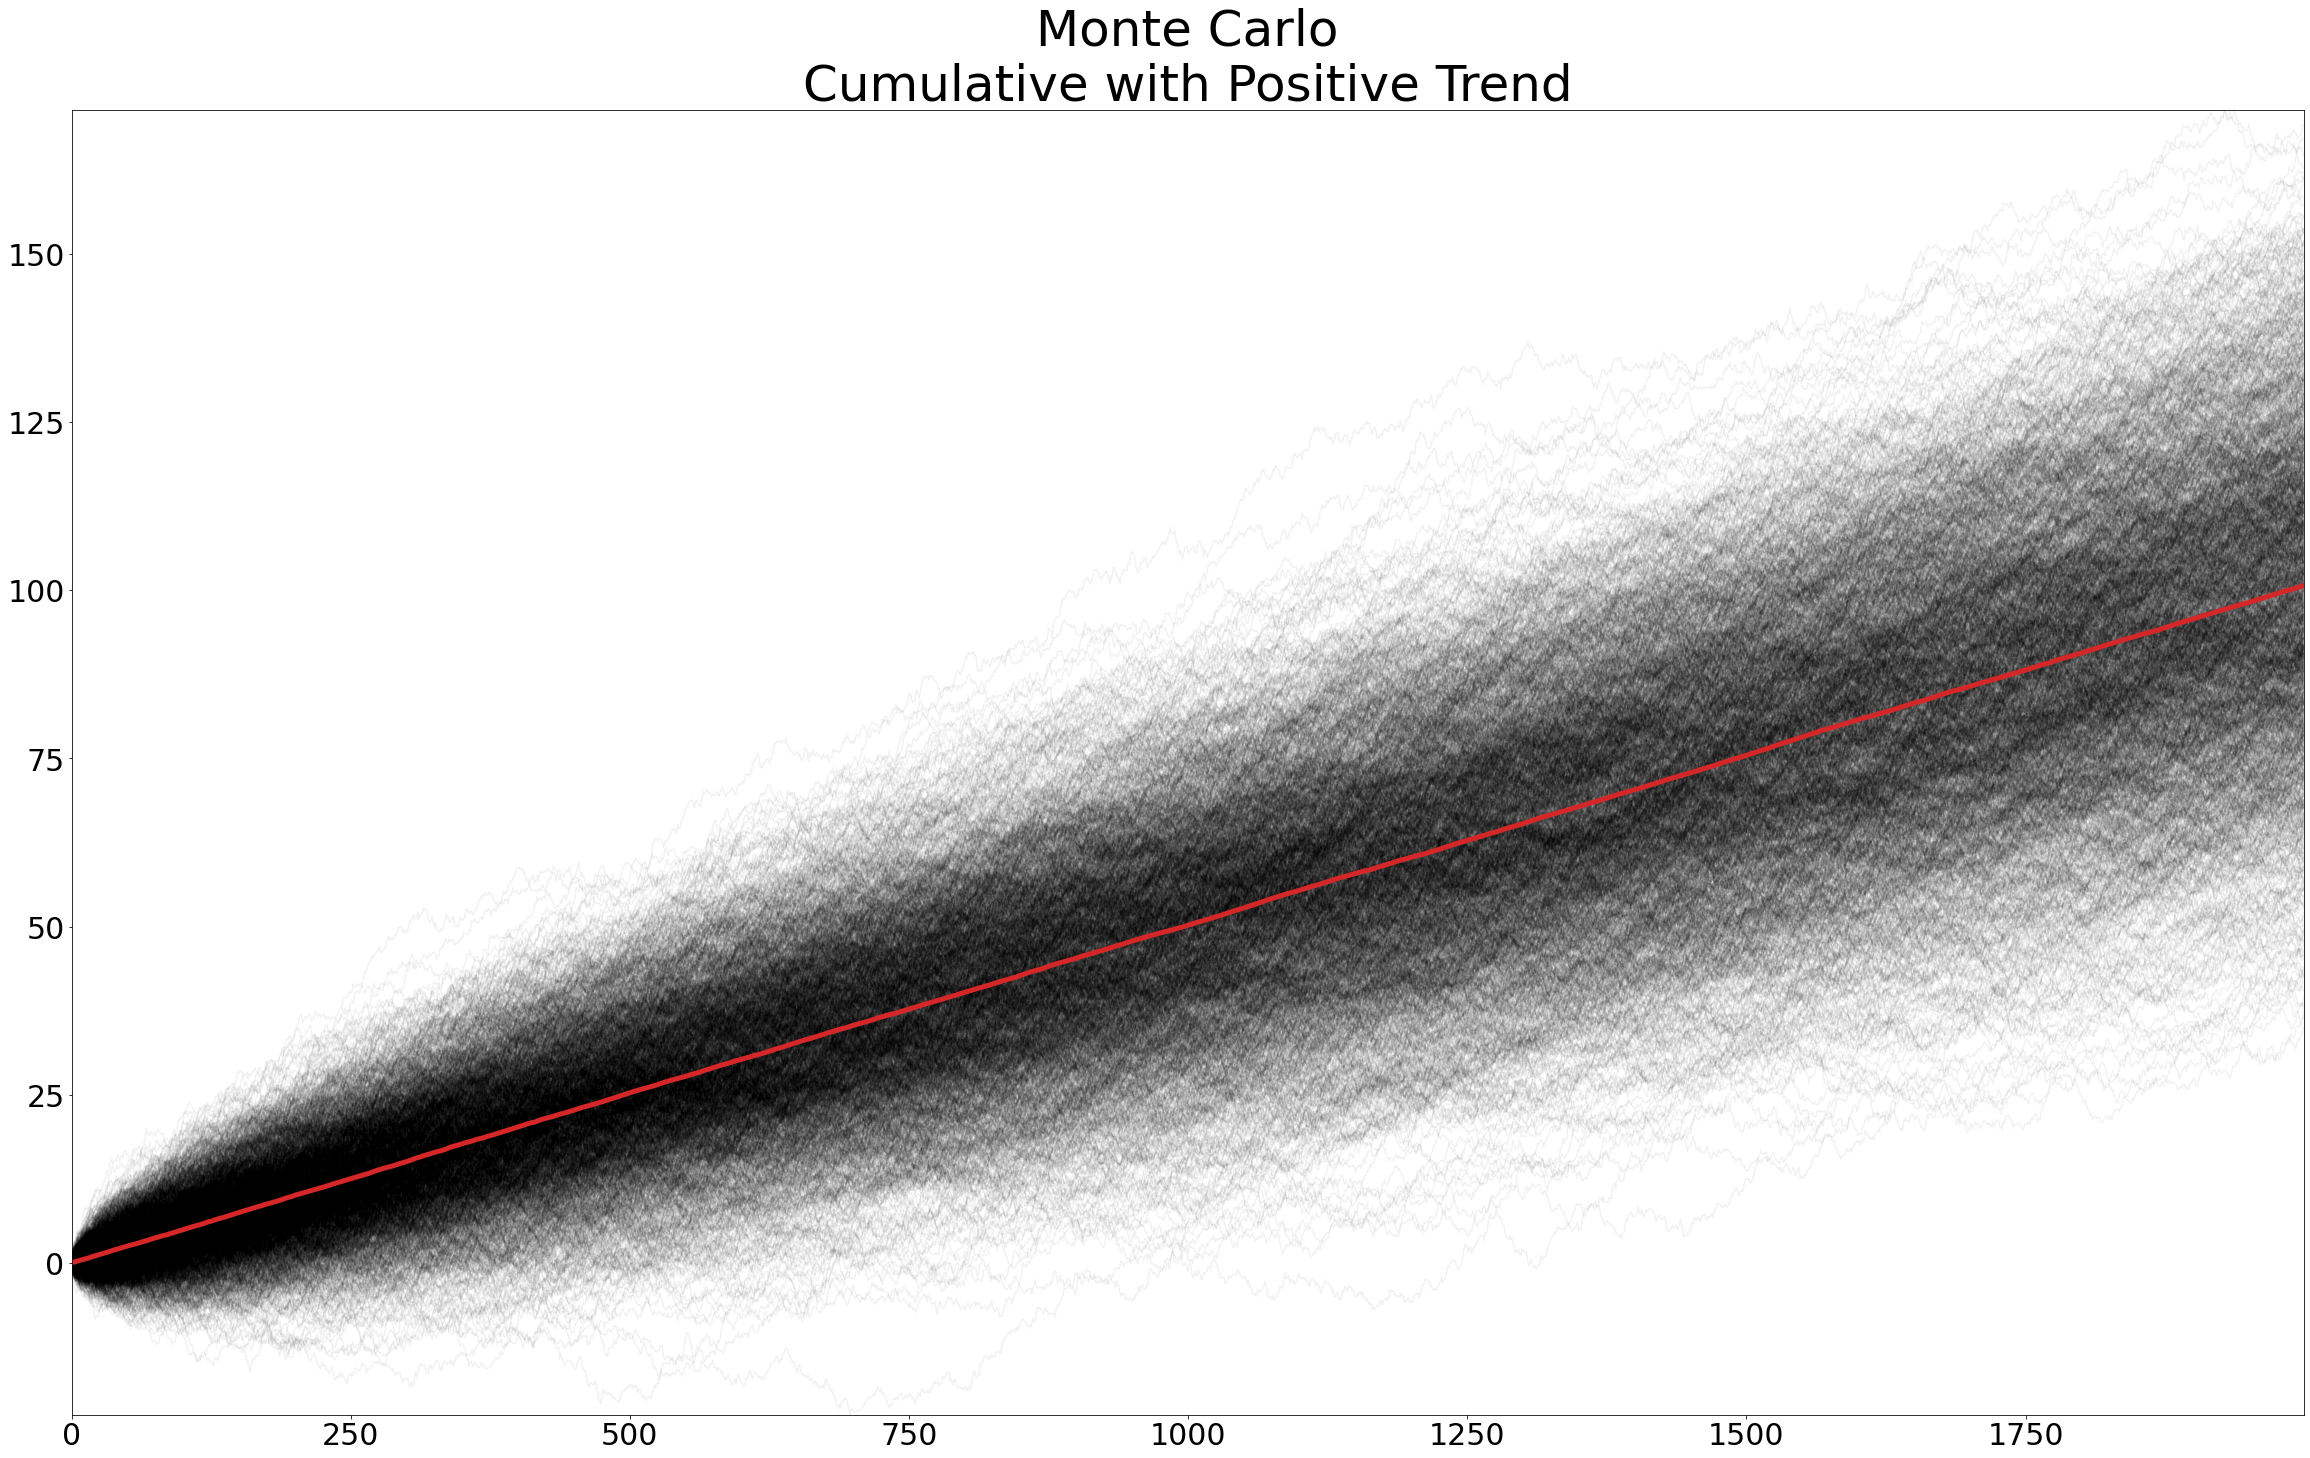

In [11]:
plot_monte_carlo_sim(monte_carlo_sim_df,  
    title = "Monte Carlo\nCumulative with Positive Trend", logy = False)


### Calculating Expected Value

In [12]:
monte_carlo_sim_df["mean"] = monte_carlo_sim_df.mean(axis = 1)
monte_carlo_sim_df["mean"]

0         0.046245
1         0.081739
2         0.130615
3         0.179066
4         0.220082
           ...    
1995    100.473453
1996    100.523272
1997    100.604450
1998    100.642818
1999    100.707316
Name: mean, Length: 2000, dtype: float64

### Simulating Changes in Portfolio Values

In [13]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

# make a list of the close data for each stock
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)

In [14]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change

MSFT      AAPL       IBM      GOOG
Date                                              
2005-01-03       NaN       NaN       NaN       NaN
2005-01-04  0.003740  0.010270 -0.010742 -0.040501
2005-01-05 -0.002235  0.008758 -0.002068 -0.005090
2005-01-06 -0.001120  0.000775 -0.003109 -0.025632
2005-01-07 -0.002991  0.072811 -0.004366  0.028109
...              ...       ...       ...       ...
2021-11-22 -0.009560  0.002927  0.003619 -0.019166
2021-11-23 -0.006327  0.002422  0.002747 -0.002186
2021-11-24  0.000681  0.003284 -0.000514 -0.000269
2021-11-26 -0.024356 -0.031678 -0.007881 -0.026660
2021-11-29  0.023932  0.026847  0.029189  0.024880

[4257 rows x 4 columns]

In [15]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace =True)
close_data_normalized

MSFT        AAPL       IBM       GOOG
Date                                                  
2005-01-03   1.000000    1.000000  1.000000   1.000000
2005-01-04   1.003740    1.010270  0.989258   0.959499
2005-01-05   1.001496    1.019118  0.987212   0.954615
2005-01-06   1.000374    1.019908  0.984143   0.930146
2005-01-07   0.997382    1.094169  0.979847   0.956292
...               ...         ...       ...        ...
2021-11-22  12.708676  142.473004  1.246318  29.131229
2021-11-23  12.628272  142.818082  1.249743  29.067549
2021-11-24  12.636874  143.287033  1.249101  29.059728
2021-11-26  12.329095  138.747925  1.239256  28.284993
2021-11-29  12.624159  142.472910  1.275429  28.988720

[4257 rows x 4 columns]

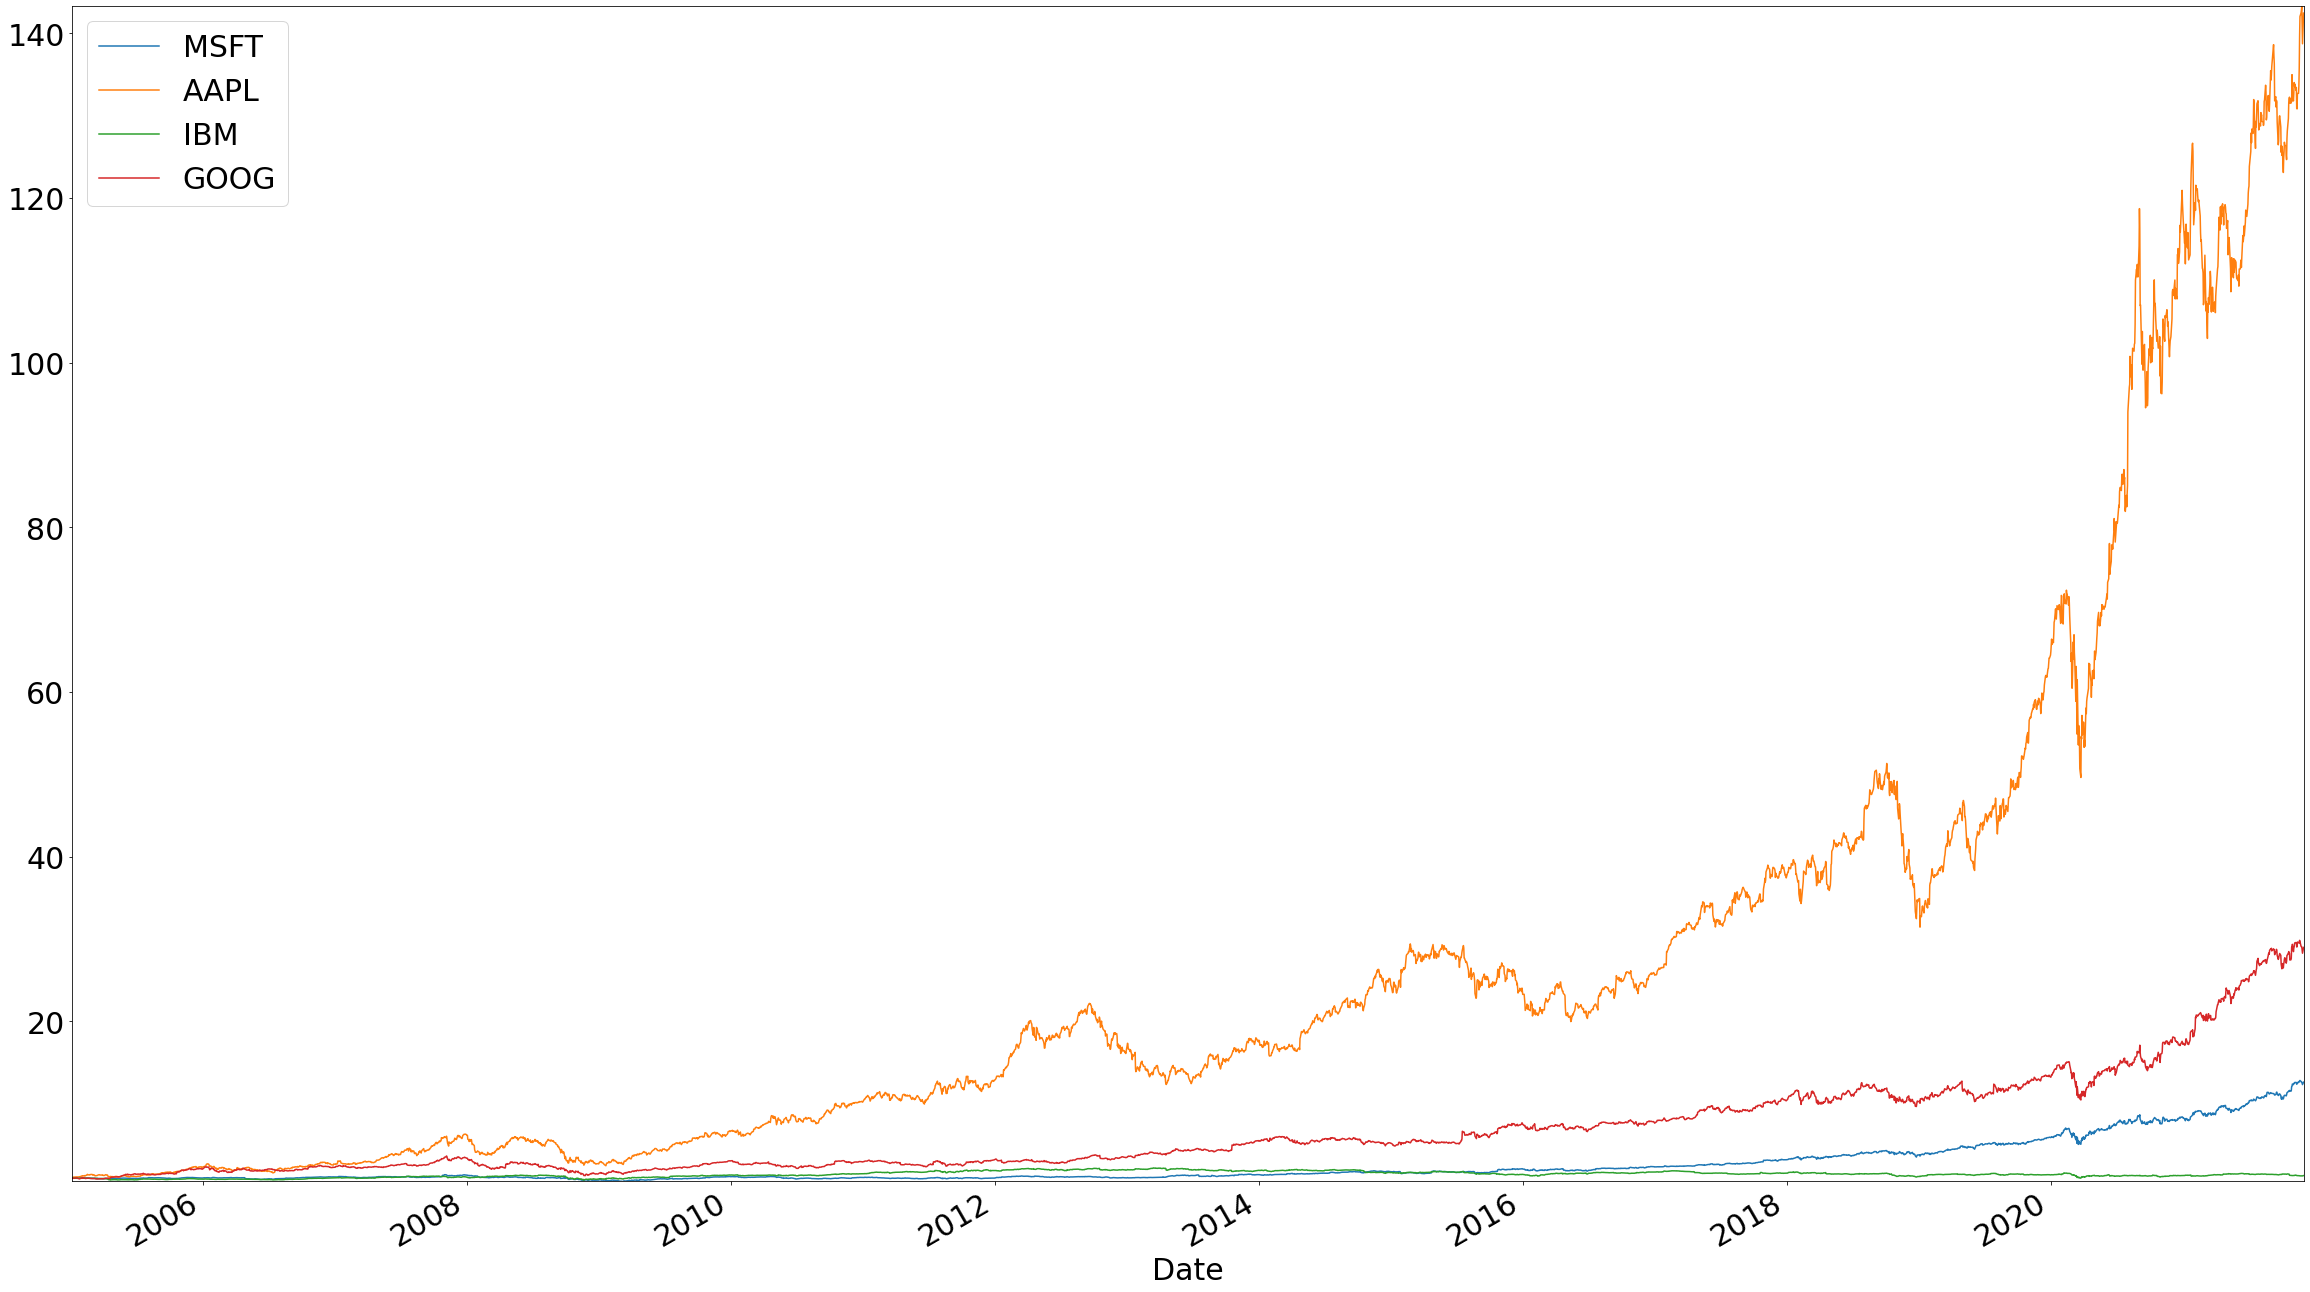

In [16]:
fig, ax = plt.subplots(figsize=(40,24))
close_data_normalized.plot.line(ax = ax)
plt.show()
plt.close()

### Daily Rate of Return

Derive the daily rate of return from the present value equation.

>$PV = \frac{FV}{(1 + r)^t}$
>
>Overall rate of return: $R=\frac{FV}{PV}$

Discount the overall rate of return to find the average rate of return. We will use this to define the mean of the standard normal distribution:

>$ r = (R)^{\frac{1}{t}} - 1$
>
>$t$ is measured in days

In [17]:
mean_var_df = pd.DataFrame({"mean": close_data_normalized.iloc[-1].div(close_data_normalized.iloc[0]) ** (
                                1 / close_data_normalized["MSFT"].count()) - 1, 
                            "sigma" : close_data_pct_change.std()})
mean_var_df

mean     sigma
MSFT  0.000596  0.017060
AAPL  0.001166  0.020772
IBM   0.000057  0.014591
GOOG  0.000791  0.018619

In [ ]:
num_sims = 500
dates = list(close_data_df.index)
monte_carlo_sim_dict = {}
for stock in stocks:
    monte_carlo_sim_dict[stock] = {}
    mean = mean_var_df["mean"][stock]
    sigma = mean_var_df["sigma"][stock]   
    run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict[stock], dates)
#    monte_carlo_sim_dict[stock] = pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod()
monte_carlo_sim_dfs = {stock: pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod() for stock in stocks}

In [ ]:
monte_carlo_sim_dfs

In [ ]:
def plot_monte_carlo_sim(sim_data, observed_data = None, title = None, logy = True):
    sim_data["mean"] = sim_data.mean(axis=1)    
    index = sim_data.index
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop(["mean"], inplace = False, axis = 1).plot.line(
            legend=False, marker =".", markersize = .1, color = "k", alpha = .05, logy = logy, ax = ax)
    if observed_data is not None:
        observed_data.plot.line(legend = False, color = "C2", linewidth = 5, logy = logy, ax = ax)
    
        # find x coordinate of lowest value observed
        obs_text_x = observed_data[observed_data == observed_data.min()].index
        plt.text(obs_text_x, observed_data.loc[obs_text_x] * .7,
                 "Observed", fontsize = 70, color = "C2")
    sim_data["mean"].plot.line(legend = False, color = "C3", 
                               linewidth = 5, logy = logy, ax = ax)
    plt.text(index[-400], sim_data["mean"].iloc[-400] * 1.5, "Exp\nVal",
            fontsize = 70, color = "C3")
   
    
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

In [ ]:
monte_carlo_sim_dfs[stock].median(axis = 1)

In [ ]:
for stock in stocks:
    plot_monte_carlo_sim(monte_carlo_sim_dfs[stock], close_data_normalized[stock], stock, logy= True)


## Calculate Portfolio Return

In [ ]:
portfolio_weights = {stock: 1 / len(stocks) for stock in stocks}
portfolio_weights

In [ ]:
ex_return = pd.DataFrame(close_data_normalized.apply(lambda x :x.mul(portfolio_weights[x.name]), axis = 0).sum(axis=1),
                        columns = ["Portfolio Return"])
close_data_normalized["Portfolio Return"] = ex_return
close_data_normalized

In [ ]:
close_data_normalized.plot.line(legend=False, logy = True)

In [ ]:
ex_return_pct_change = ex_return.pct_change()
ex_return_pct_change.dropna(inplace = True)
ex_return_pct_change

In [ ]:
mean_var_df = pd.DataFrame({"mean": (ex_return.iloc[-1] / ex_return.iloc[0]) **(1 / ex_return["Portfolio Return"].count()) -1,
                           "sigma" : ex_return_pct_change.std()})
mean_var_df

In [ ]:
num_sims = 1000
dates = ex_return.index
monte_carlo_sim_dict = {}
mean = mean_var_df["mean"]["Portfolio Return"]
sigma = mean_var_df["sigma"]["Portfolio Return"]
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, dates)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).add(1).cumprod()
monte_carlo_sim_df

In [ ]:
plot_monte_carlo_sim(monte_carlo_sim_df, ex_return["Portfolio Return"], "Portfolio Return", logy= True)